# Análise IMDB dataset

Neste Notebook será feita a pesquisa e amostragem da base [IMDB-WIKI](https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/), que juntas somam aproximadamente 500.000 imagens de pessoas.
Por ser um dataset relativamente grande, contém muitos ruídos (imagens incompletas, sem face , borradas etc.), o que nos leva a aplicar uma séries de pré-processamentos que possam viabilizar sua análise. 

#### Módulos e Bibliotecas



Para a exportação da base e averiguação de amostragem, iremos utilizar uma série de bibliotecas, são elas:

- Numpy -> O NumPy é uma biblioteca Python para realizar cálculos em Arrays Multidimensionais;
- Matplotlib -> O Matplotlib é uma biblioteca de plotagem para a linguagem de programação Python;
- OpenCV ->  É uma biblioteca multiplataforma, para o desenvolvimento de aplicativos na área de Visão computacional;
- Scipy - > SciPy é uma biblioteca em Python que foi feita para matemáticos, cientistas e engenheiros.

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.io import loadmat #Módulo para manipular arquivos .matlab
from datetime import datetime #Calcular idade

%matplotlib inline

#### Características da base

O dataset IMDB-WIKI contém no total de 7 + 1(idade) rótulos para identificar as informações relevantes das imagens, são elas:

- faceScore -> Índice de confiança do detector de faces nas imagens;
- FullPath-> Diretorio da imagem no dataset;
- gender -> Gênero;
- photoTaken-> Ano em que a foto foi tirada;
- dob-> Data de nascimento;
- Age -> Idade(Estipulado a partir dos argumentos PhotoTaken e dob);
- secondfacescore-> Caso particular onde há mais de um rosto detectado na imagem.

#### Metodos

- Para extrair e manipular a base, serão utilizadas os seguintes metodos:

In [8]:
def calc_age(taken, dob):
    birth = datetime.fromordinal(max(int(dob) - 366, 1))

    # Assumindo idade média
    if birth.month < 7:
        return taken - birth.year
    else:
        return taken - birth.year - 1

In [14]:
def get_meta(mat_path, db): #Carregar Base
    meta = loadmat(mat_path)
    full_path = meta[db][0, 0]["full_path"][0]
    dob = meta[db][0, 0]["dob"][0] 
    gender = meta[db][0, 0]["gender"][0]
    photo_taken = meta[db][0, 0]["photo_taken"][0]  
    face_score = meta[db][0, 0]["face_score"][0]
    second_face_score = meta[db][0, 0]["second_face_score"][0]
    age = [calc_age(photo_taken[i], dob[i]) for i in range(len(dob))]

    return full_path, dob, gender, photo_taken, face_score, second_face_score, age

In [15]:
cols, rows = 4, 3
img_num = cols * rows

def show_imgs(img_paths):# Visualizar imagens
    img_ids = np.random.choice(len(img_paths), img_num, replace=False)
    for i, img_id in enumerate(img_ids):
        plt.subplot(rows, cols, i + 1)
        img = cv2.imread(path_root + str(img_paths[img_id]))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    
    plt.show()


In [16]:
db = "wiki" # 1ª Base
path_root = "{}_crop/".format(db) 
mat_path = "{}_crop/{}.mat".format(db, db)



- Carregando Wiki:

In [17]:
w_full_path, w_dob, w_gender, w_photo_taken, w_face_score, w_second_face_score, w_age = get_meta(mat_path, db)
print("Imagens no dataset WIKI: {}".format(len(w_face_score)))

Imagens no dataset WIKI: 62328


- Carregando IMDB:

In [18]:
db = "imdb"
mat_path = "{}_crop/{}.mat".format(db, db)
im_full_path, im_dob, im_gender, im_photo_taken, im_face_score, im_second_face_score, im_age = get_meta(mat_path, db)
print("Imagens no dataset IMDB: {}".format(len(im_face_score)))

Imagens no dataset IMDB: 460723


- Agora podemos plotar gráficos usando matplotlib:

### 1- Distribuição de Idades

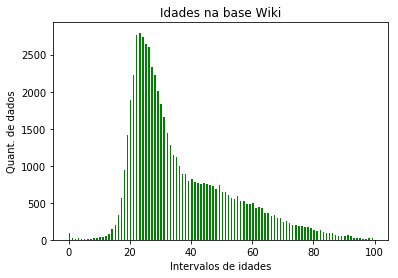

In [9]:
#WIKI - HISTOGRAMA
hist = plt.hist(w_age, bins=np.arange(0,100, 0.5), color ='g')
plt.title("Idades na base Wiki")  
plt.xlabel('Intervalos de idades')
plt.ylabel('Quant. de dados')
plt.grid = True



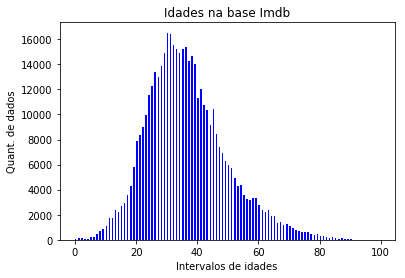

In [10]:
#IMDB - HISTOGRAMA
hist = plt.hist(im_age, bins=np.arange(0,100, 0.5), color ='b')
plt.title("Idades na base Imdb")  
plt.xlabel('Intervalos de idades')
plt.ylabel('Quant. de dados')
plt.grid = True


 - Das 62328 imagens no dataset Wiki, podemos verificar a concentração de idades entre 20 a 30 anos, por outro lado a base do imdb com suas 460723 imagens é a que mais se assemelha a uma distribuição gaussiana(normal), ou seja, é bem mais distribuida naturalmente. É de suma importância que as bases possam manter uma classificação considerável entre as idades.

## 2 - Distribuição de gênero

 - Podemos verificar a distribuição das bases por gênero através de gráficos do tipo pizza:

In [64]:
def grafGender(gender, db):
    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))
    genders = ["Mulheres","Homens"]
    genders2 = [0,0]

    for i in gender:
        if (i == 0):
            genders2[0] +=1
        if (i == 1):
            genders2[1] += 1

    def pizza(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d} imagens)".format(pct, absolute)

    wedges, text, autotexts =  ax.pie(genders2,autopct=lambda pct:pizza(pct,genders2),textprops = dict(color='w'))
    ax.legend(wedges, genders, title = "{}".format(db), loc = "center left", bbox_to_anchor = (1,0,0.5,1))
    plt.setp(autotexts,size=8, weight = 'bold')
    ax.set_title("Gênero {}".format(db))
    plt.show()


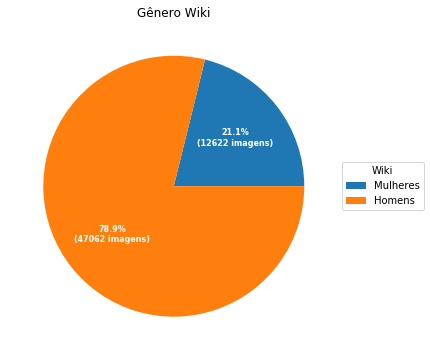

In [47]:
grafGender(w_gender, "Wiki")

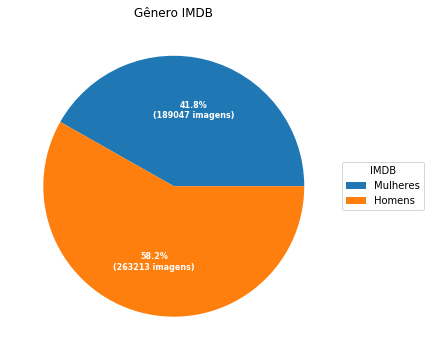

In [49]:
grafGender(im_gender,"IMDB")

- Em ambos os casos, o gênero predominante é o masculino, o que acabaria se tornando mais para frente um empecilho na precisão da rede neural, uma vez que a base já não está balanceada e nem se quer passou pela filtragem de ruídos, ou seja, tende a piorar ainda mais a acurácia de treinamento por desbalanceio. Uma ressalva no entanto, é o fato da base do imdb ser consideravelmente extensa, podendo manter um nível ainda considerável após a filtragem de dados, diferentemente da base wiki.

## 3 - Filtragem de Ruídos 

- Por serem bases geradas através de websites na Internet, muitas das imagens acabam se perdendo com o tempo, apresentando diversos ruídos que vão desde a falhas na captura de rostos, até mesmo imagens borradas, ilegíveis ou não classificadas na base de dados. 
Os algoritmos utilizados para captura de rostos nas imagens produzem um valor ao identificar cada face. Este valor que chamaremos de confiança de face, foi devidamente adicionado ao banco de dados(face_score), nos possibilitando manipulá-lo da melhor maneira possível. 

### 3.1 Confiança de face e inconsistências na base 

- Utilizando o método show_imgs(), podemos checar uma série de inconsistências e exibi-las em lotes de imagens. Como por exemplo, é possível filtrar os dados com confiança abaixo de 1.0 da base Wiki com os comandos abaixo:

In [55]:
img_paths = [] ## Lista que irá armazenar as imagens

for i in range(len(w_face_score)):
    if w_face_score[i] < 1.0: ## Se a confiança for menor que 1.0
        img_paths.append(w_full_path[i][0])

print("#imagens com confiança inferior a 1.0 -> {}".format(len(img_paths)))


#imagens com confiança inferior a 1.0 -> 19335


- Considerando a base Wiki, de 62328 imagens, 19335 delas estão abaixo de 1.0 de confiança.Esta quantidade de imagens representa um total aproximado de 30.65% do dataset. Imagens com confiança inferior a este valor influenciam na precisão do treinamento da rede por terem ruídos demais ou não estarem com o rosto frontalmente na hora da foto. Como é possível ver pela plotagem abaixo:


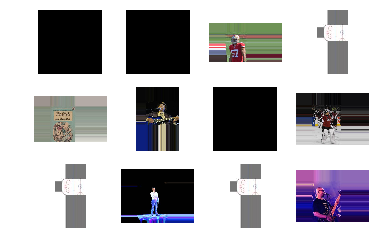

In [56]:
show_imgs(img_paths)

- Pelas ilustrações acima, é perceptível que muitas estão ilegíveis e sequer apresentam faces, tornando-as inviáveis para o treinamento da rede neural. Sendo assim, é indispensável realizar um pré-processamento que possa preparar o dataset final.

## 4- Pré-Processamento

O pré-processamento da base IMDB-WIKI consistem em retirar as falhas e ruídos da base, portanto é necessário um script que possa realizar esta varredura, logo o arquivo [imdb_mat.py](https://github.com/Brunogomes97/Imdb/blob/master/imdb_mat.py) no repositório consiste em:

- Remover as imagens que não atingiram o mínimo de confiança (Padrão -> face_score < 1.0);
- Remover as imagens sem classificação ou que possuam segunda face(second_face_score);
- Incluir imagens no intervalo de idade estipulado para treinamento(de 0 a 100 anos de idade);
- Eliminar imagens sem rotulo de gênero;


O script imdb_mat.py retorna na saída um dataframe contendo a base pré-processada gerada em um arquivo .matlab. Podemos carrega-la usando o seguinte método:

In [37]:
from functions import load_data #método para carregar o dataframe

m_image, m_gender, m_age  = load_data("serializer/MATimdb64.mat") #dataframe gerado pelo imdb_mat (IMDB).

wk_image,wk_gender,wk_age = load_data("serializer/matwiki64.mat")# Wiki

Após carregar a base o dataset IMDB, podemos manipular da melhor forma possível, sendo possível fazer a comparação e averiaguação de amostragem da nova base de dados:

In [6]:
print(len(image))#quantidade de imagens da base IMDB
#Quantidade anterior -> 460723

171852


Conforme é possível verificar, a base imdb perde aproximadamente 62.7% dos dados pela filtragem, o que gera um desbalanceio das informações muito maior que antes. Podemos analisar esta comparação através do histograma a seguir: 

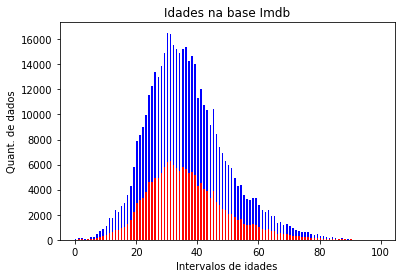

In [32]:
#IMDB - HISTOGRAMA
plt.hist(im_age, bins=np.arange(0,100, 0.5), color ='b')# Cor azul
plt.hist(m_age, bins=np.arange(0,100, 0.5), color ='r')# Cor Vermelha
plt.title("Idades na base Imdb")  
plt.xlabel('Intervalos de idades')
plt.ylabel('Quant. de dados')
plt.grid = True


- Com a plotagem dos histogramas, é possível enxergar a queda brusca no número de dados. Por outro lado, a base ainda manteve a proporção de idades que encontrava no dataset sem filtragem.
- Checando a proporção de gênero para antes e depois, temos o seguinte resultado:


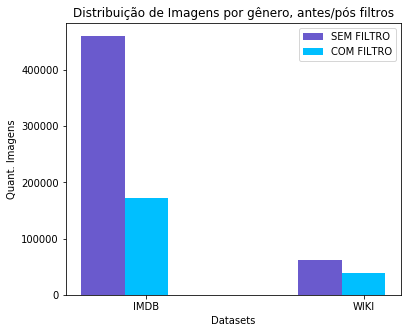

In [62]:
genders1 = [len(im_gender),len(w_gender)] 
genders2 = [len(m_gender), len(wk_gender)]

barWidth = 0.2
plt.figure(figsize = (6,5))

r1 = np.arange(len(genders1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, genders1, color = '#6A5ACD', width = barWidth , label = 'SEM FILTRO')
plt.bar(r2, genders2, color = '#00BFFF', width = barWidth , label = 'COM FILTRO')


plt.xlabel("Datasets")
plt.xticks([r +  barWidth for r in range(len(genders1))], ['IMDB','WIKI'])


plt.ylabel("Quant. Imagens")
plt.title("Distribuição de Imagens por gênero, antes/pós filtros")

plt.legend()
plt.show()

- Em gêneros pós filtro temos:

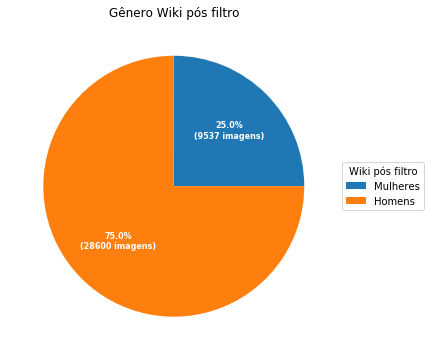

In [68]:
grafGender(wk_gender, "Wiki pós filtro")

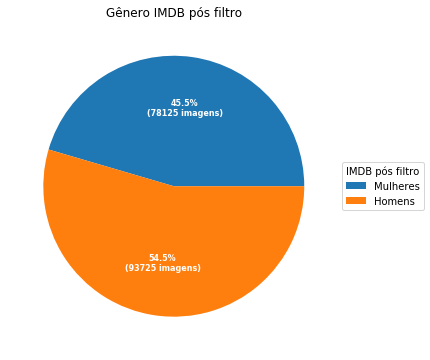

In [67]:
grafGender(m_gender, "IMDB pós filtro")

## 5- Conclusões

- Após analisar os datasets foi possível constatar a importância de se filtrar os erros das bases de dados, uma vez que as suas falhas podem prejudicar a efetividade e qualidade do treinamento final. No geral, foi possível assimilar o desnível entre idades no dataset, o que pode gerar uma certa deficiência na acurácia no que diz respeito aos extremos(crianças e idosos). Sendo assim, podemos utilizar uma série de alternativas para contornar este problema, em que consiste em utilizar datasets menores com imagens mais limpas(poucos ruídos)como forma de treinamento conjunto, finetuning e até mesmo validação, ou então utilizar técnicas de processamento de imagem que possam gerar mais imagens nestes subconjuntos de dados.